两种模型网络

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Creating a graph
1. 带环的有向图
2. 三角网络（四个王者峡谷地图）

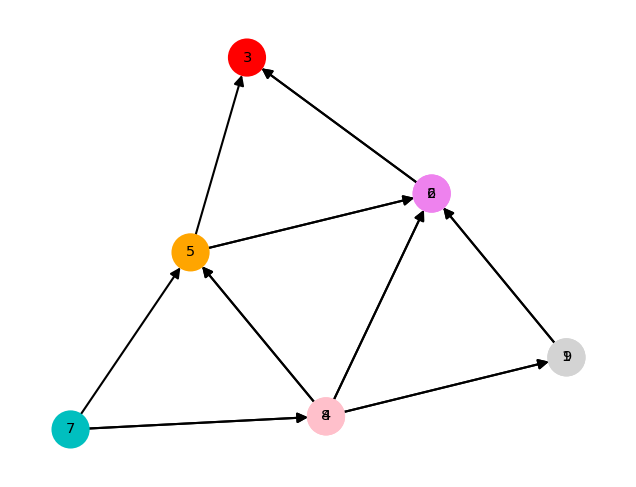

In [8]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4, 3)

G = nx.DiGraph()
# 带环的有向图
# G.add_weighted_edges_from([(1,2,1),(2,3,1),(3,4,1),(4,5,1),(5,6,1),(6,7,1),(7,8,1),(8,1,1),
#                 (2,11,1),(12,4,1),(13,6,1),(8,14,1)])
# balance=[0]*8+[0.5,-0.5,-0.5,0.5]
# color=['lightgray','limegreen','lightgray','orange','lightgray',
#        'orange','lightgray','limegreen',
#        'pink','c','c','pink']
# true_label=[1,2,1,3,1,3,1,2,5,4,4,5]

# 三角网络
G.add_weighted_edges_from([(1,2,1),
                           (2,3,1),
                           (4,1,1),(4,2,1),(4,5,1),
                           (5,2,1),(5,3,1),(5,6,1),
                           (6,3,1),
                           (7,4,1),(7,5,1),(7,8,1),
                           (8,5,1),(8,6,1),(8,9,1),
                           (9,6,1)])
balance=[0]*9
balance[2]=1
balance[6]=-1
color=['lightgray','violet','r','pink','orange','violet','c','pink','lightgray']
true_label=[1,2,3,4,5,2,6,4,1]

nx.draw_kamada_kawai(G, with_labels=True, node_color=color, node_size=300, font_size=7)
plt.show()

## RoleMagnet

In [3]:
import rolemagnet as rm
vec,role,label=rm.role_magnet(G, balance=balance)

Embedding: 100.00%  -
SOM shape: [10, 7]
Training SOM: 54


## Visualization
可视化节点的向量表示，用PCA降到二维后再次可视化

三维嵌入结果
1 	 [-3.98509766e-14 -2.36805103e+00  0.00000000e+00]
2 	 [11.01807526  1.88981068  0.        ]
3 	 [13.41057808 -9.53738195 26.06776207]
4 	 [-11.01807526   1.88981068   0.        ]
5 	 [-9.36340152e-15  1.57769860e+01  0.00000000e+00]
6 	 [9.64668987 2.12712929 0.        ]
7 	 [-13.41057808  -9.53738195 -26.06776207]
8 	 [-9.64668987  2.12712929  0.        ]
9 	 [-4.00135667e-14 -2.36805103e+00  0.00000000e+00]


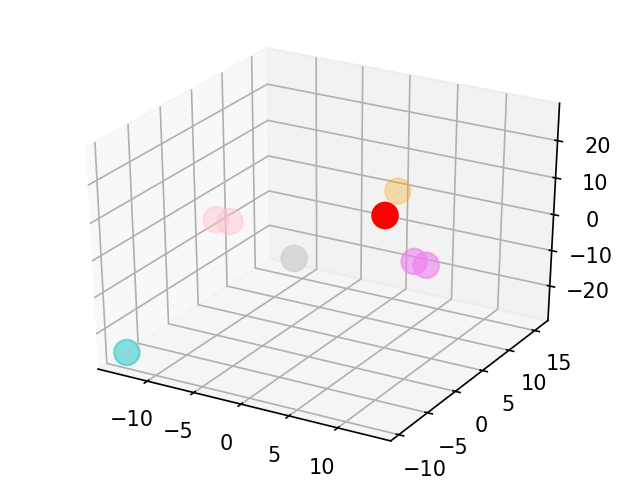

二维嵌入结果
1 	 [-2.85769288e-15 -3.31866864e-01]
2 	 [0.83230689 0.26484461]
3 	 [ 2.51303687 -1.3366017 ]
4 	 [-0.83230689  0.26484461]
5 	 [-5.03413080e-16  2.21104141e+00]
6 	 [0.72871225 0.29810326]
7 	 [-2.51303687 -1.3366017 ]
8 	 [-0.72871225  0.29810326]
9 	 [-2.98861398e-15 -3.31866864e-01]


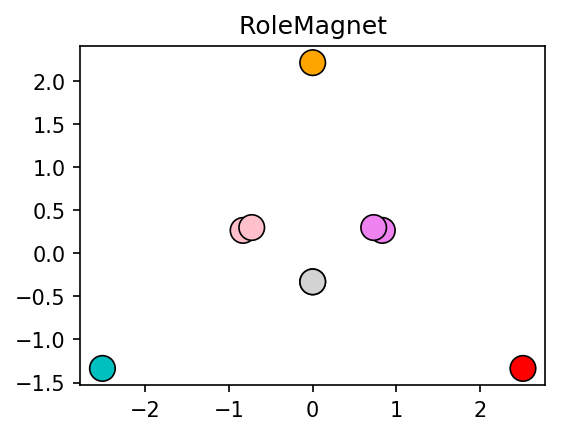

In [4]:
print ('三维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',vec[i])
    
from mpl_toolkits.mplot3d import Axes3D
coord = np.transpose(vec)
fig = plt.figure(figsize=(4,3))
ax = Axes3D(fig)
ax.scatter(coord[0], coord[1], coord[2], c=color, s=150)
plt.show()

# 再次降到二维
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

reduced=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(vec))
print ('二维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',reduced[i])

coord = np.transpose(reduced)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("RoleMagnet")
plt.show()

## Evaluation
用 Adjusted Rand Index 和 V-Measure 两种指标评价聚类结果

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_completeness_v_measure



print('Adjusted Rand Index:',adjusted_rand_score(true_label,label))
print('V-Measure:',homogeneity_completeness_v_measure(true_label,label))
print('\n聚类结果')
for k,v in role.items():
    print(k,v[0])
    for i in v[1]:
        print('   ',list(G.nodes)[i])

Adjusted Rand Index: 1.0
V-Measure: (1.0, 1.0, 1.0)

聚类结果
29 [-0.2 -0.4]
    1
    9
38 [0.8 0.2]
    2
    6
63 [ 2.6 -1.4]
    3
24 [-0.8  0.2]
    4
    8
34 [-0.2  2.2]
    5
0 [-2.6 -1.4]
    7
